## Maximum likelihood approach for logistic regression

$Author: Jaylen\; Diao\;刁金龙 \quad Stu No: 11510422  \quad   Date: 2019/04/01  $

### Introduction

Consider the logistic regression for two-class problemp: Assuming that  

$
\qquad {\bf w} = (w_0,w_1,...,w_d )^T ,
$

and x includes the constant 1 in its first component


$ \qquad
Pr(y=1|{\bf X}={\bf x}) = \frac{e^{({\bf w}^{T}x)}}{1+e^{({\bf w}^{T}x)}}
$;

$ \qquad
Pr(y=0|{\bf X}={\bf x}) = \frac{1}{1+e^{({\bf w}^{T}x)}}.
$

By a logit transformation, $ \log[\frac{p}{1− p}]$, we recover a linear regression model:

$ \qquad
\log \frac{Pr(y=1|{\bf X}={\bf x})}{Pr(y=0|{\bf X}={\bf x})} = {\bf w}^{T}x
$

The decision boundary is the set of points for which the above quantity is zero, and this
is a hyperplane defined by $ {\bf w}^{T}x = 0.$

### Sigmoid Function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. Often, sigmoid function refers to the special case of the logistic function shown in the first figure and defined by the formula

$ \qquad
\sigma (a) = \frac{1}{1+e^{(-a)}}
$

In general, a sigmoid function is monotonic, and has a first derivative which is bell shaped. A sigmoid function is constrained by 0 and 1 as ${\displaystyle x\rightarrow \pm \infty }$.




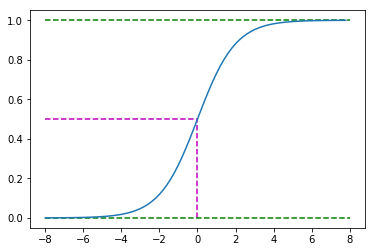

In [13]:
import numpy as np
import matplotlib.pyplot as plt
 
def sigmoid(x):
    # 直接返回sigmoid函数
    return 1. / (1. + np.exp(-x))
 
def plot_sigmoid():
    # param:起点，终点，间距
    x = np.arange(-8, 8, 0.2)
    y = sigmoid(x)
    
    plt.vlines(0, 0, 0.5, colors = "m", linestyles = "dashed")
    plt.hlines(0.5, -8, 0, colors = "m", linestyles = "dashed")
    plt.hlines(0, -8, 8, colors = "g", linestyles = "dashed")
    plt.hlines(1, -8, 8, colors = "g", linestyles = "dashed")

    plt.plot(x, y)
    plt.show()
    
%matplotlib inline
plot_sigmoid()


### Probility Distribution 

Remember that we have used the maximum likelihood approach to interpret the linear
regression. Now we apply the same method to two-class logistic regression. 

Given $\Bbb D = (({\bf x}_1,y_1),({\bf x}_2,y_2),...,({\bf x}_n,y_b)), {\bf x}_i \in {\Bbb R}^d, y \in \lbrace0,1\rbrace$

$ \qquad
y_i \sim Bernouli(\sigma({\bf w}^{T}x)))
$

For convenience, we write this distribution as 
  
$
\qquad \alpha_i = \sigma({\bf w}^T {\bf x_i}) = p_{1}({\bf x_i};{\bf w}) = 1- p_{0}({\bf x_i};{\bf w})
$


${Compute \; \alpha \;Matrix \\
输入参数w是d*1列向量，xdata是n*d矩阵} $ 

In [109]:
# 初始化一个样例
w = np.array([0.1,0.2,0.2])
w = np.mat(w)
w = np.transpose(w)
data = np.array([[1,2,3],[2,2,1],[1,3,1]])
data = np.mat(data)
y = np.array([1,0,1])
y = np.mat(y)
y = np.transpose(y)
print("w = \n",w)
print("data = \n", data)
print("y = \n",y)

w = 
 [[0.1]
 [0.2]
 [0.2]]
data = 
 [[1 2 3]
 [2 2 1]
 [1 3 1]]
y = 
 [[1]
 [0]
 [1]]


In [110]:
from numpy import mat
def getAlphaMatrix(w,xdata):
    
    wT_x = np.dot(np.transpose(w),np.transpose(xdata))

    return np.exp(np.transpose(wT_x))/(1+np.exp(np.transpose(wT_x)))

getAlphaMatrix(w,data)


matrix([[0.75026011],
        [0.68997448],
        [0.7109495 ]])

### Likelihood function

\begin{equation}
{\bf w_{MLE}} \in \underbrace{argmax}_{\bf w} \;\; P({\Bbb D}|{\bf w})
\end{equation}


Denote the probability $ P r (y = k|{\bf X} = {\bf x}) = p_k ({\bf x};{\bf w}), k = $ 0 or 1. The likelihood function is defined by
\begin{equation}
L({\bf w})=\prod_{i=1}^n p_{y_i}({\bf x_i};{\bf w}) = \prod_{i=1}^n \alpha_i^{y_i}(1-\alpha_i)^{1-y_i}
\end{equation}

where $y_i$ is the label of the i-th sample $x_i$. The log-likelihood can be reformulated as
\begin{align}
l({\bf w})&=\sum_{i=1}^n log \; p_{y_i}({\bf x_i};{\bf w}) \\
&= \sum_{i=1}^n y_i log \; \alpha_i + (1-y_i)log(1-\alpha_i) \\
&= \sum_{i=1}^n y_i \left({\bf w}^{T} {\bf x_i} - log(1+e^{{\bf w}^T {\bf x_i}})\right)+ (1-y_i)\left(-log(1+e^{{\bf w}^T {\bf x_i}})\right) \\
&= \sum_{i=1}^n \lbrace y_i {\bf w}^T {\bf x_i} - log(1+e^{{\bf w}^T {\bf x_i}}) \rbrace
\end{align}

### Score equation
Firstly, we can do some transformation for the coming computation.
\begin{equation}
\frac{\partial}{\partial w_j}log(\alpha) = \frac{\partial}{\partial w_j} \sigma({\bf w}^T {\bf x}) = \frac {e^{{\bf w}^{T}{\bf x}}\;{x_j}} {1+e^{{\bf w}^T {\bf x}}} = x_j \; (1-\alpha)
\end{equation}

Similarly,  we have

\begin{equation}
\frac{\partial}{\partial w_j}log(1-\alpha) = \cdots = -x_j + x_j \; (1-\alpha) = -x_j\alpha
\end{equation}

Hence, 

\begin{align}
\frac{\partial}{\partial w_j} l({\bf w}) = 0 &= \sum_{i=1}^n y_i x_{ij} (1-\alpha_i) - (1-y_i)(\alpha_i x_{ij}) \\
&= \sum_{i=1}^n y_i x_{ij} - \alpha_i x_{ij} \\
&= \sum_{i=1}^n (y_i - \alpha_i)x_{ij} \\
&= \sum_{i=1}^n x_{ij}(y_i - p_{y_i}({\bf x_i};{\bf w}))
\end{align} 

Where ${\bf x_i} = (x_{i1},x_{i2},\cdots, x_{id})$, d represents the dimention of the ${\bf x}$.




### Gradient of w
$ \qquad \qquad \qquad \qquad \qquad
{\Bbb A}= \left\{ \begin{matrix} x_{11} & x_{12} & \cdots & x_{1d}\\ x_{21} & x_{22} & \cdots & x_{2d}\\ \vdots & \vdots & \ddots & \vdots \\ x_{n1} & x_{n2} & \cdots & x_{nd} \end{matrix} \right\}
$

Fix j, we have

\begin{equation}
\frac{\partial}{\partial w_j} l({\bf w})  =  \sum_{i=1}^n (y_i - \alpha_i)x_{ij} 
\end{equation} 

Write it in a metrix way, we obtain 
$\quad
g = \nabla_{\bf w} l = {\Bbb A}^{T}(\alpha-{\bf y})
$


${Compute \; \nabla_{\bf w} \;Vector \\
输入参数w是d*1列向量，xdata是n*d矩阵,y是d*1的列向量} $ 

In [111]:
def getGradient(w,xdata,y):
    
    alpha_mat = getAlphaMatrix(w,xdata)
#     print("alpha_mat = ",alpha_mat)
    return np.dot(np.transpose(xdata),(alpha_mat-y))

getGradient(w,data,y)

matrix([[ 0.84115857],
        [ 0.01331768],
        [-0.3482957 ]])

${Compute \; B_{\bf w} \;Matrix \\
输入参数w是d*1列向量，xdata是n*d矩阵} $ 

In [112]:
def getWeightedMatrix(w,xdata):
    
    alpha_mat = getAlphaMatrix(w,xdata)
    # print("alpha_mat = ",alpha_mat)
    degree = len(xdata)
    # print("degree = ",degree)
    B = np.zeros((degree,degree))
    for i in range(degree):
        B[i][i] = float(alpha_mat[i][0])*(1-float(alpha_mat[i][0]))
    return B

getWeightedMatrix(w,data)

array([[0.18736988, 0.        , 0.        ],
       [0.        , 0.2139097 , 0.        ],
       [0.        , 0.        , 0.20550031]])

###  Hessian matrix of $l({\bf w})$

From the gradient of ${\bf w}$, let us take one more derivative of this gradient, we get
\begin{equation}
\frac{\partial}{\partial w_j\partial w_k} l({\bf w})  = - \sum_{i=1}^n x_{ij} \frac{\partial}{\partial w_k} \alpha_i
\end{equation} 


In order to figure out the derivative, we consider

\begin{align}
{\partial log\alpha} &= \frac{\partial \alpha}{\alpha} \\
{\partial \alpha} &= \alpha {\partial log\alpha} \\
&= \alpha x_j(1-\alpha)
\end{align}
where $j = \lbrace 1,2,3,\cdots,n \rbrace $.

\begin{equation}
\implies \frac{\partial}{\partial w_k} \alpha_i = x_{ik}\alpha_i(1-\alpha_i)
\end{equation}

\begin{align}
\implies \frac{\partial}{\partial w_j\partial w_k} l({\bf w}) &= - \sum_{i=1}^n x_{ij} \frac{\partial}{\partial w_k} \alpha_i \\
&= - \sum_{i=1}^n  x_{ij}x_{ik}\alpha_i(1-\alpha_i) \\
&= \sum_{i=1}^{n} x_ix_i^{T} p_{y_i}({\bf x_i};{\bf w})(1-p_{y_i}({\bf x_i};{\bf w}))\\
\implies &=- {\Bbb Z_j}^{T}{\Bbb B}{\Bbb Z_k}
\end{align}
\\
  
Where ${\Bbb Z_j} = (x_{1j},x_{2j},\cdots,x_{nj})^{T},\; {\Bbb B} =  \left\{ \begin{matrix} \alpha_1(1-\alpha_1) & 0 & \cdots & 0\\ 0 & \alpha_2(1-\alpha_2) & \cdots & 0\\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \alpha_n(1-\alpha_n) \end{matrix} \right\}$ 

Therefore, the Hessian matrix should be

\begin{align}
{\Bbb H} = \nabla_{\bf w}^{2} l &= {\Bbb A}^{T}{\Bbb B}{\Bbb A} \\
\end{align}












${Compute \; Hessian \;Matrix \\
输入参数w是d*1列向量，xdata是n*d矩阵} $ 

In [113]:
def getHessianMatrix(w,xdata):
    alpha_mat = getAlphaMatrix(w,xdata)
    B = getWeightedMatrix(w,xdata)
    return np.dot(np.dot(np.transpose(xdata),B),xdata)

getHessianMatrix(w,data)


matrix([[1.24850897, 1.84687947, 1.19542934],
        [1.84687947, 3.45462107, 2.16853959],
        [1.19542934, 2.16853959, 2.10573892]])

### Newton-Raphson method approach
Finally, apply newton method to solve the parameters ${\bf w}$. There are three steps for solving it.

  
 $(1).\;Initialize \;{\bf w}={\bf w^{(0)}}$
  

$(2).\;At\; the\; k-th \;step, {\bf w}^{(k)} = {\bf w}^{(k-1)} - {\Bbb H}^{-1}\lfloor_{{\bf w}^{(k-1)}}\quad·\quad g$

  
$(3).\; Once \;|{\bf w}^{k} - {\bf w}^{k-1}|<\epsilon, stop;\; otherwise,\; go\; back\; to \;step (2).$

In [138]:
def newtonMethod(n, w, xdata, y):

    time = n
    g = getGradient(w ,xdata ,y)
    H = getHessianMatrix(w ,xdata)
#     print("第{}次迭代，所得矩阵如下：".format(time))
#     print('g = ', g)
#     print('H = ', H)
#     print('w = ', w)

    Next_w = w - np.dot(np.linalg.inv(H) ,g)
    print("\n第{}次迭代: \n所得参数 w = {}\n|Next_w - w| = {}.".format(time,w.T,str(np.linalg.norm(w - Next_w))))

    if np.linalg.norm(w - Next_w) < 1e-06:
        print('\n达到精度要求 |Next_w - w| = {} <1e-06 \n '.format(str(np.linalg.norm(w - Next_w))))
        '''设置迭代跳出条件'''
        return Next_w
    else:
        return newtonMethod(n + 1, Next_w ,xdata ,y)

    
# newtonMethod(1, w, data, y)


## ${\star}{\star}{\star}\quad$ 算法检验 $\quad{\star}{\star}{\star}$
Apply the program developed in the previous step to play with the South African
Heart Disease data: https://sci2s.ugr.es/keel/dataset.php?cod=184. 
  
We will use the copy of the data set already partitioned by means of 5-folds cross validation.
This set of data, named “saheart-5-fold”, is also provided in the package of this
project. Note that there are five groups of data, each of which consists of a training
set (e.g. “saheart-5-1tra.dat”) and a test set (e.g. “saheart-5-1tst.dat”). Train the model by the training set in each group and test the model by the test set in the
same group. Evaluate your results in terms of accuracy. (Hint: you have to do
one-hot encoding for the non-numeric attributes)


In [115]:
import numpy as np
import pandas as pd
import re
import os.path

In [117]:

def read_dat(filename):

    filename = filename
    con_new = []
    with open(filename,'r' ) as f:
        contents = f.readlines()
        contents = list(contents)
        con_new.append([])  # 第一行列名

        for i in contents[0:14]:
            try:
                attribute = re.findall(r'@attribute (.+?) ', i)[0]
                con_new[0].append(attribute)
            except:
                pass

        del contents[:14]

        for i,con in enumerate(contents):
            tmp = con.strip()
            tmp = tmp.split(',')
            con_new.append([])
            con_new[i+1].append(int(tmp[0]))
            con_new[i+1].append(float(tmp[1]))
            con_new[i+1].append(float(tmp[2]))
            con_new[i+1].append(float(tmp[3]))
            con_new[i+1].append(tmp[4])
            con_new[i+1].append(int(tmp[5]))
            con_new[i+1].append(float(tmp[6]))
            con_new[i+1].append(float(tmp[7]))
            con_new[i+1].append(int(tmp[8]))
            con_new[i+1].append(int(tmp[9]))

    df = pd.DataFrame(con_new[1:],columns=con_new[0])

    return df

def getXYtrain_test(df_train,df_test):

    xtrain = pd.get_dummies(df_train.loc[:,'Sbp':'Age'], prefix=['Famhist'])
    xtrain = np.array(xtrain)
    ytrain = np.array(df_train.loc[:,'Chd'])

    xtest = pd.get_dummies(df_test.loc[:,'Sbp':'Age'], prefix=['Famhist'])
    xtest = np.array(xtest)
    ytest = np.array(df_test.loc[:,'Chd'])

    return xtrain,ytrain,xtest,ytest


In [139]:
# 主函数测试
root_path = 'C:/Users/49732/Desktop/BigDataProjects/project-1/saheart-5-fold/'
train_name = 'saheart-5-' + str(1) + 'tra.dat'
test_name = 'saheart-5-' + str(1) + 'tst.dat'
train_file_path = os.path.join(root_path,train_name)
test_file_path = os.path.join(root_path,test_name)

train_df = read_dat(train_file_path)
test_df = read_dat(test_file_path)

xtrain, ytrain, xtest, ytest = getXYtrain_test(train_df,test_df)

w = np.array([0 ,0,0,0 ,0 ,0,0 ,0 ,0,0])
w = np.mat(w)
w = np.transpose(w)
# print(w)
data = np.mat(xtrain)
y = np.mat(ytrain)
y = np.transpose(y)
# print("w = \n" ,w)
# print("data = \n", data)
# print("y = \n" ,y)
final_w = newtonMethod(1, w, data, y)
print(final_w.T)


第1次迭代: 
所得参数 w = [[0 0 0 0 0 0 0 0 0 0]]
|Next_w - w| = 5.05990928344392.

第2次迭代: 
所得参数 w = [[ 0.00519231  0.08222348  0.12660645  0.00983893  0.02371088 -0.04067755
  -0.00416106  0.02377418 -3.92038342 -3.19492766]]
|Next_w - w| = 2.0890090564818733.

第3次迭代: 
所得参数 w = [[ 6.56226326e-03  9.71951372e-02  1.54683043e-01  1.87747702e-02
   3.54037491e-02 -5.74322530e-02 -4.32493635e-03  3.56976702e-02
  -5.48990242e+00 -4.57293896e+00]]
|Next_w - w| = 0.5287401250365746.

第4次迭代: 
所得参数 w = [[ 6.74586466e-03  9.96318295e-02  1.59298135e-01  2.04295943e-02
   3.80947591e-02 -5.93631426e-02 -4.19598825e-03  3.89143867e-02
  -5.88104957e+00 -4.92863360e+00]]
|Next_w - w| = 0.02452977155602159.

第5次迭代: 
所得参数 w = [[ 6.75035175e-03  9.97253195e-02  1.59469218e-01  2.04816372e-02
   3.82045825e-02 -5.93831289e-02 -4.18678785e-03  3.90724239e-02
  -5.89905749e+00 -4.94528733e+00]]
|Next_w - w| = 4.758758989000873e-05.

第6次迭代: 
所得参数 w = [[ 6.75035529e-03  9.97254809e-02  1.59469518e-01  2.04817163

### 根据 final_w 计算出来的 $y_i$ = 1的概率 $\quad{\star}{\star}{\star}$
$Pr(y=1|{\bf X}={\bf x}) = \frac{e^{({\bf w}_{final}^{'}\;\; x)}}{1+e^{({\bf w}_{final}^{'}\;\; x)}}$

In [166]:
predict = np.dot(final_w.T,np.transpose(np.mat(xtrain)))
probility = (np.exp(predict.T)/(1+np.exp(predict.T))).T.tolist()[0]
print(probility[:10]) 

[0.7372125832925219, 0.35200585532216383, 0.2542132496512069, 0.648398787514912, 0.7242045343126333, 0.579594786858259, 0.2642487293904019, 0.6750559294160994, 0.13353252621109532, 0.5888423990217194]


### 训练集判断模型准确度 $\quad{\star}{\star}{\star}$
$模型准确度\;Rate = \frac{预测与真实相同的个数}{总样本量}$

In [167]:
equal = 0 # 预测的分类与真实值相同的个数
not_equal = 0 # 不同的个数
for i,y in enumerate(list(ytrain)):
    # 设定概率大于0.5，就分类为1，否则为0
    if probility[i] >= 0.5:
        c = 1
    else:
        c = 0
    if c == y:
        equal += 1
    else:
        not_equal += 1
print("模型训练集准确度 Rate = ",equal/(equal+not_equal))

模型训练集准确度 Rate =  0.7567567567567568


### 测试集判断模型准确度 $\quad{\star}{\star}{\star}$

In [168]:
# data = np.mat(xtest)
# y = np.mat(ytest)
# y = np.transpose(y)
predict = np.dot(final_w.T,np.transpose(np.mat(xtest)))
probility = (np.exp(predict.T)/(1+np.exp(predict.T))).T.tolist()[0]
print("测试集数据量：",len(probility)) 

equal = 0 # 预测的分类与真实值相同的个数
not_equal = 0 # 不同的个数
for i,y in enumerate(list(ytest)):
    # 设定概率大于0.5，就分类为1，否则为0
    if probility[i] >= 0.5:
        c = 1
    else:
        c = 0
    if c == y:
        equal += 1
    else:
        not_equal += 1
print("模型测试集准确度 Rate = ",equal/(equal+not_equal))

测试集数据量： 92
模型测试集准确度 Rate =  0.6847826086956522


### 与 sklearn 自带的 LogisticRegression 包算法作对比 $\quad{\star}{\star}{\star}$


In [153]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [154]:
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
print("模型准确度 Rate = ",clf.score(xtrain, ytrain))

模型准确度 Rate =  0.7371273712737128


In [155]:
test_predict = clf.predict(xtest)

conf_matrix = metrics.confusion_matrix(ytest, test_predict)
df_metrix = np.array(conf_matrix)
conf_matrix = np.round(df_metrix, 2)
print("测试集混淆矩阵为：\n",conf_matrix)

true_rate = accuracy_score(ytest, test_predict)
print("\n测试集准确度 Rate = ",true_rate)

测试集混淆矩阵为：
 [[53  8]
 [18 14]]

测试集准确度 Rate =  0.7204301075268817


#### Sklearn LogisticRegression在五个训练集和测试集上的表现

In [169]:
print("Sklearn LogisticRegression在五个训练集和测试集上的表现:\n")
for i in range(5):

    train_name = 'saheart-5-' + str(i+1) + 'tra.dat'
    test_name = 'saheart-5-' + str(i+1) + 'tst.dat'
    train_file_path = os.path.join(root_path,train_name)
    test_file_path = os.path.join(root_path,test_name)
    train_df = read_dat(train_file_path)
    test_df = read_dat(test_file_path)
    xtrain, ytrain, xtest, ytest = getXYtrain_test(train_df,test_df)
    clf = LogisticRegression()
    clf.fit(xtrain, ytrain)
    print('训练样本集{}准确度为：{}.'.format(i+1,round(clf.score(xtrain, ytrain),3)))
#     print('测试样本集{}准确度为：{}.'.format(i+1,round(clf.score(xtest, ytest),3)))


Sklearn LogisticRegression在五个训练集和测试集上的表现:

训练样本集1准确度为：0.737.
训练样本集2准确度为：0.724.
训练样本集3准确度为：0.735.
训练样本集4准确度为：0.73.
训练样本集5准确度为：0.757.


####  我们开发的算法在五个数据集上的表现：
训练样本集1准确度为：0.7398373983739838    
训练样本集2准确度为：0.7506775067750677  
训练样本集3准确度为：0.7513513513513513   
训练样本集4准确度为：0.7405405405405405  
训练样本集5准确度为：0.7567567567567568   

## ${\star}{\star}{\star}\quad$由以上结果可以看出，Maximum likelihood approach for logistic regression 与 Sklearn 的效果基本一致，在Pycharm上测试速度，我的算法大概比自带的包速度快4倍，模型精度等各项指标均和自带的包类似 $\quad{\star}{\star}{\star}$

## ${\star}{\star}{\star}\quad$完结 $\quad{\star}{\star}{\star}$